<a href="https://colab.research.google.com/github/edgarrr19/SimMat2025/blob/main/Tarea_1_2_Optimizaci%C3%B3n_escalar_con_SymPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas de optimización escalar
Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento, así como los resultados obtenidos.

1. El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

Siendo un triángulo isósceles, dos lados iguales '$x$' más la base '$b$' dan igual al perímetro:
$P=10=2x+b$, y despejando x:  $x=\frac{10-b}{2}$.
La altura desde la base al vértice sería:
$h=\sqrt{x^2-(\frac{b}{2})^2}=\sqrt{(\frac{10-b}{2})^2-(\frac{b}{2})^2}$



In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [60]:
b = sym.var('b', positive=True)
P = 10
x = (P - b)/2
h = (x**2 - (b/2)**2)**0.5
V= sym.pi/3 * b * h**2
V

pi*b*(-b**2/4 + (5 - b/2)**2)**1.0/3

In [61]:
dv=sym.diff(V,b)
c=sym.solve(dv,b)
c

[2.50000000000000]

In [63]:
V_max=V.subs(b,float(c[0]))
V_max, float(V_max)

(10.4166666666667*pi, 32.72492347489368)

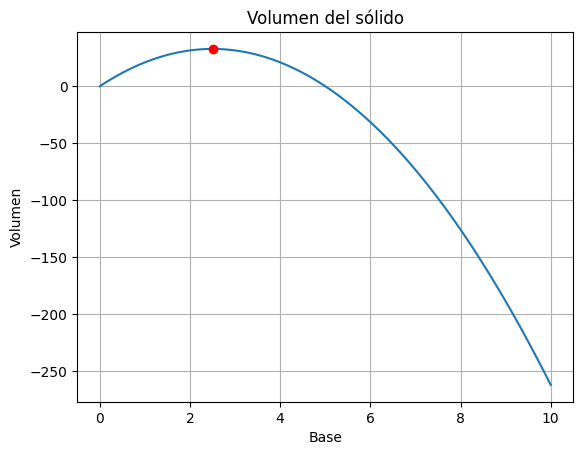

In [41]:
V_num = sym.lambdify(b, V, 'numpy')
b_num = np.linspace(0,10,100)
V_vals = V_num(b_num)
plt.plot(b_num, V_vals)
plt.plot(float(c[0]), V_num(float(c[0])), 'ro')  # punto crítico
plt.xlabel('Base')
plt.ylabel('Volumen')
plt.title('Volumen del sólido')
plt.grid()

**Resultado**
La base óptima debe de ser de $2.5\;\mathrm{cm}$, los lados iguales del triángulo $3.75\;\mathrm{cm}$ y el volumen de $32.725\;\mathrm{cm^3}$

2. Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

In [52]:
b = 6
pos = sym.var('p', positive=True)
tr = b - 2*pos
f = pos * tr
f

p*(6 - 2*p)

In [53]:
df = f.diff(pos)
c = sym.solve(df, pos)
c

[3/2]

In [57]:
a_max=f.subs(pos,float(c[0]))
a_max

4.50000000000000

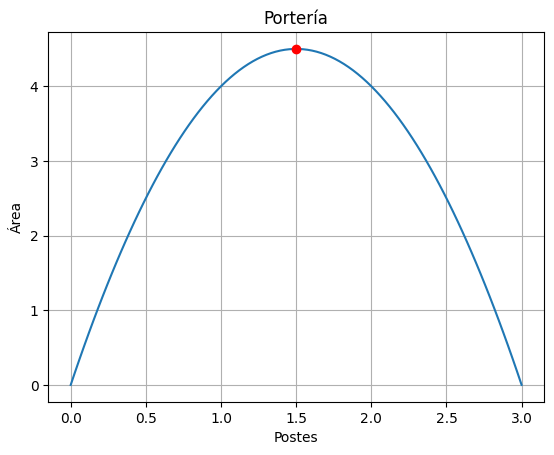

In [56]:
f_num = sym.lambdify(pos, f, 'numpy')
x_num = np.linspace(0, b/2, 100)
y_num = f_num(x_num)

plt.plot(x_num, y_num)
plt.plot(c[0], f_num(float(c[0])), 'ro')  # marcamos el punto crítico
plt.xlabel("Postes")
plt.ylabel("Área")
plt.title("Portería")
plt.grid()

**Resultado**
Los postes deben de medir $1.5\;\mathrm{m}$ cada uno, por lo que el travesaño debe de medir $3\;\mathrm{m}$. El área máxima total es de $4.5\;\mathrm{m^2}$.